In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
data = pd.read_csv('Data/sample_sales_data.csv',index_col='Unnamed: 0')

In [64]:
data.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 611.6+ KB


# Data Cleaning: 
    Cleanse the data to handle missing values, outliers, and inconsistencies. This step ensures that your analysis is based on accurate and reliable data.

In [22]:
data.isnull().sum() 

transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
dtype: int64

# Univariate Analysis:

    Summary Statistics: Compute basic statistics (mean, median, standard deviation, etc.) to understand the central tendency and dispersion of numerical features.

    Distribution Analysis: Visualize data distributions using histograms, box plots, or kernel density plots to identify patterns and outliers.
    
    Categorical Variable Analysis: Count the frequency of each category and visualize it using bar charts or pie charts.

In [23]:
data.describe() #Summary Statistics:

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


C:\Users\91845\AppData\Local\Temp\ipykernel_12140\2723246055.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data2, shade=True, color='skyblue', ax=axes[2])


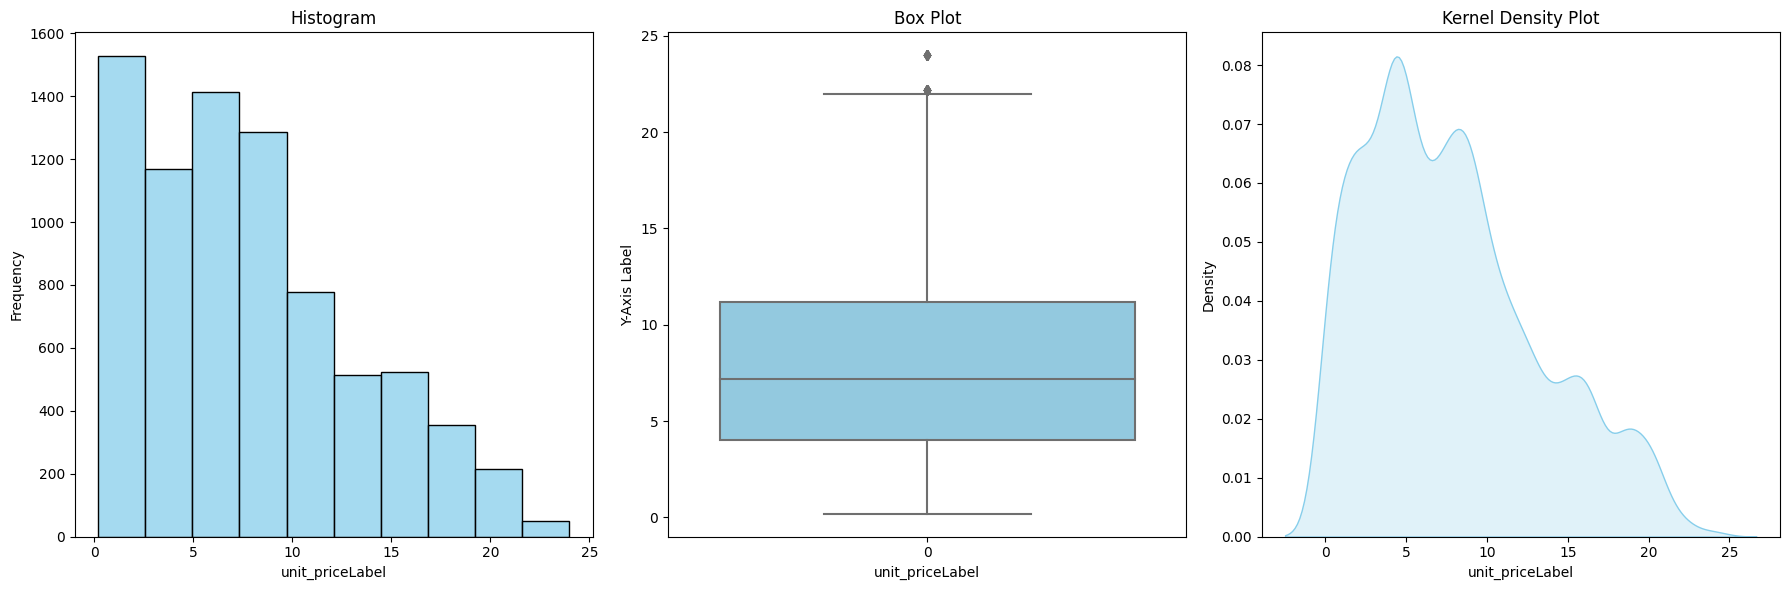

C:\Users\91845\AppData\Local\Temp\ipykernel_12140\2723246055.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data2, shade=True, color='skyblue', ax=axes[2])


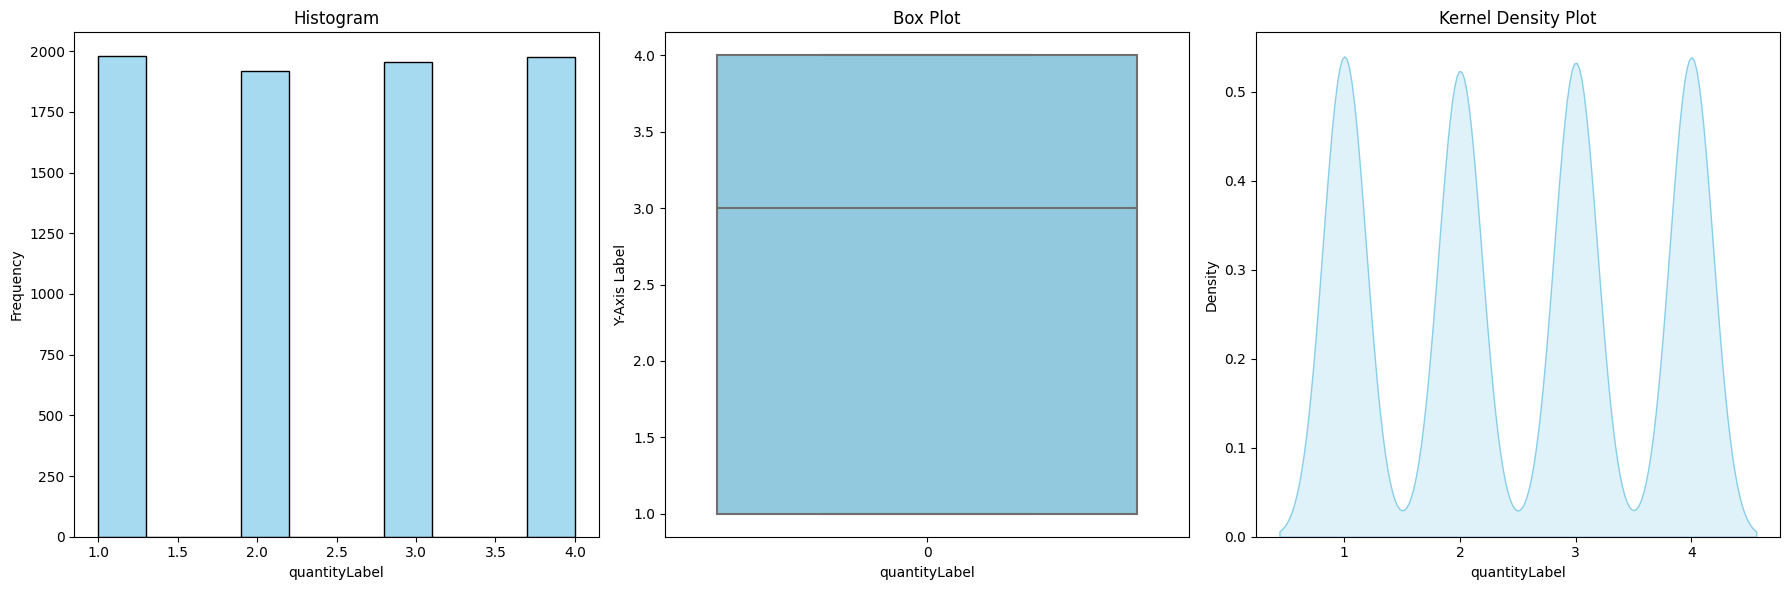

C:\Users\91845\AppData\Local\Temp\ipykernel_12140\2723246055.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data2, shade=True, color='skyblue', ax=axes[2])


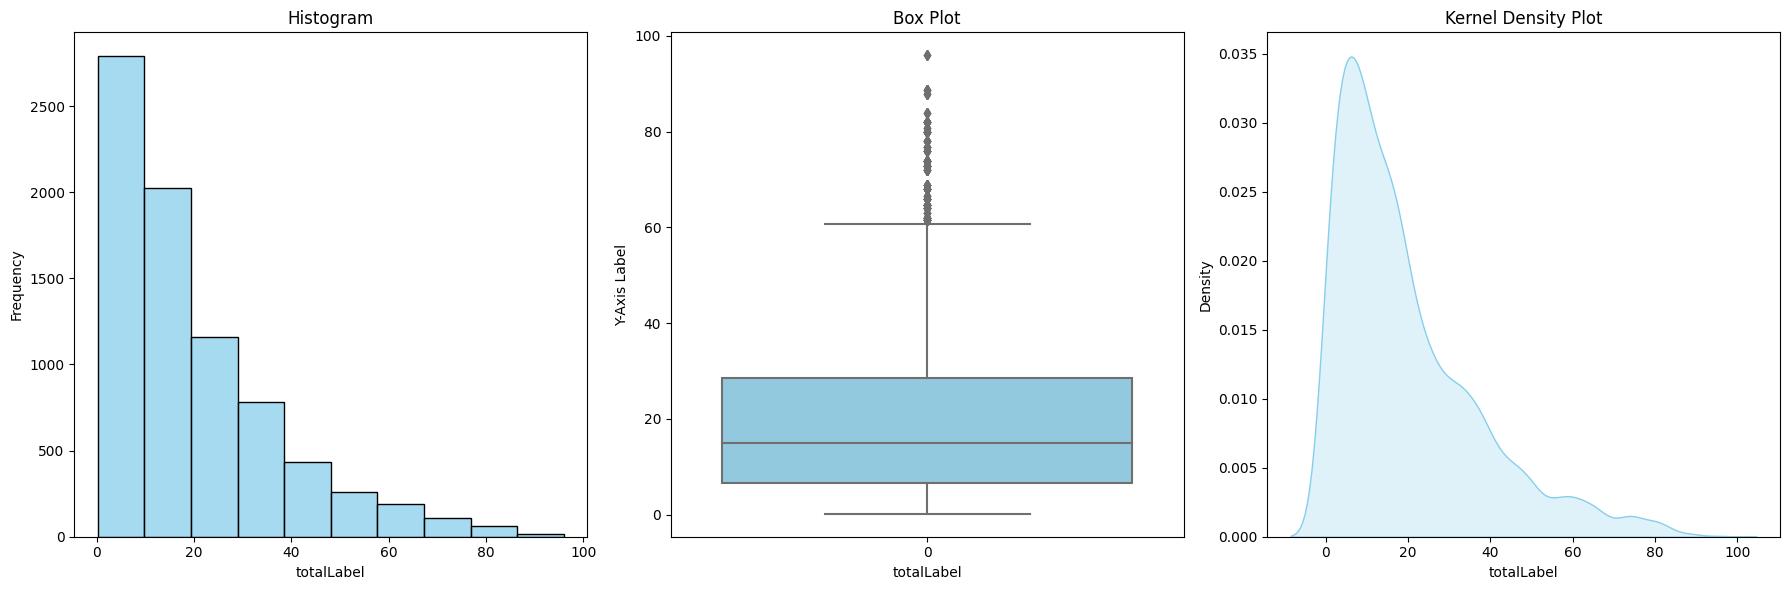

In [27]:
#Distribution Analysis
import seaborn as sns
import matplotlib.pyplot as plt


for col in data.columns[~(data.dtypes=='object')]:

    data2 = data[col]
    # Create subplots for histogram, box plot, and kernel density plot
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Histogram
    sns.histplot(data2, kde=False, bins=10, color='skyblue', ax=axes[0])
    axes[0].set_xlabel(f'{col }Label')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Histogram')

    # Box Plot
    sns.boxplot(data=data2, color='skyblue', ax=axes[1])
    axes[1].set_xlabel(f'{col }Label')
    axes[1].set_ylabel('Y-Axis Label')
    axes[1].set_title('Box Plot')

    # Kernel Density Plot
    sns.kdeplot(data2, shade=True, color='skyblue', ax=axes[2])
    axes[2].set_xlabel(f'{col }Label')
    axes[2].set_ylabel('Density')
    axes[2].set_title('Kernel Density Plot')

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()


Some valuable insights of unit_price that can be derived from the graphs are:

- The histogram shows the **frequency distribution** of the variable **unit price/sale**. It indicates that most of the sales have a unit price between **0 and 10**. The distribution is **right-skewed**, meaning that there are some sales with very high unit prices, but they are rare.
- The box plot shows the **summary statistics** of the variable **sale price** for each **unit price/sale** group. It indicates that the median sale price increases as the unit price/sale increases, but there is also more **variation** and **outliers** in the higher unit price/sale groups. The box plot also shows that there is a **positive correlation** between the two variables, meaning that higher unit prices tend to result in higher sale prices.
- The kernel density plot shows the **probability density** of the variable **unit price/sale**. It indicates that the variable has a **bimodal distribution**, meaning that there are two peaks in the data. The first peak is around **2.5** and the second peak is around **17.5**. This suggests that there are two types of sales, one with low unit prices and one with high unit prices.






Some further insights that can be derived from the graphs are:

- The histogram shows that the variable **quant1_label** has a **discrete distribution**, meaning that it can only take certain values. The values range from **1 to 6**, with 1 being the most frequent and 6 being the least frequent.
- The box plot shows that the variable **value** has a **symmetric distribution**, meaning that it is evenly spread around the median. The median is around **0.5** and the interquartile range is around **0.25**. The box plot also shows that there are no outliers in the data, meaning that all the values are within 1.5 times the interquartile range from the median.
- The kernel density plot shows that the variable **quant1_label** has a **uniform distribution**, meaning that it has the same probability for any value. The plot also shows that the probability density is around **0.17** for any value of **quant1_label**.

Some insights that can be derived from the graphs are:

- The histogram shows the **frequency distribution** of the variable **totalLabel**. It indicates that most of the data points have a value between **10 and 30**. The distribution is **unimodal** and **slightly skewed to the right**, meaning that there is a single peak and some higher values on the right tail.
- The box plot shows the **summary statistics** of the variable **X1** for each **totalLabel** group. It indicates that the median value of **X1** increases as the **totalLabel** increases, but there is also more **variation** and **outliers** in the higher **totalLabel** groups. The box plot also shows that there is a **positive correlation** between the two variables, meaning that higher values of **totalLabel** tend to be associated with higher values of **X1**.
- The kernel density plot shows the **probability density** of the variable **totalLabel**. It indicates that the variable has a **normal distribution**, meaning that it is symmetric and bell-shaped. The plot also shows that the mean and standard deviation of the variable are around **20 and 10**, respectively.

# Categorical Summary

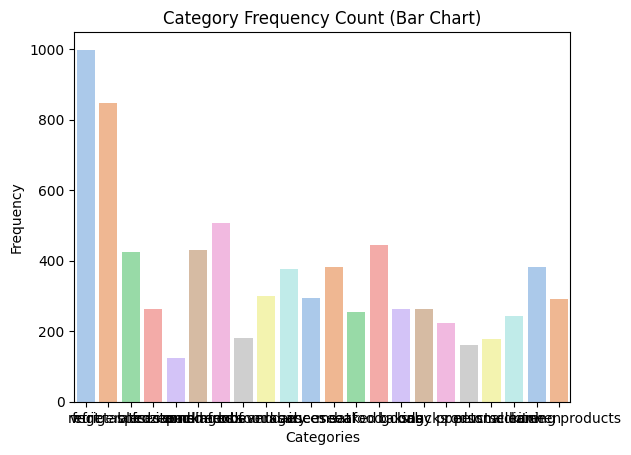

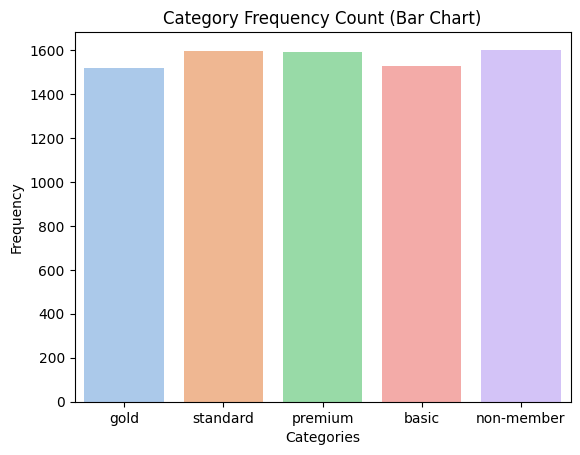

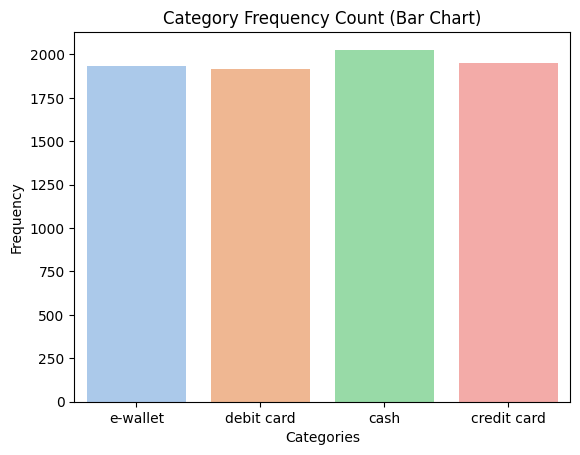

In [29]:
for col in  ['category','customer_type','payment_type']:

    # Count the frequency of each category
    category_counts = sns.countplot(x=data[col], palette='pastel')
    category_counts.set(xlabel='Categories', ylabel='Frequency')
    category_counts.set_title('Category Frequency Count (Bar Chart)')
    plt.show()



# Bivariate Analysis:

- Correlation Analysis: Determine relationships between numerical variables using correlation coefficients or scatter plots.
- Pair Plots: Visualize relationships between multiple numerical variables simultaneously.
- Categorical vs. Numerical Analysis: Compare numerical variables across different categories using box plots or violin plots.
- Time-Series Analysis: If applicable, analyze time-based patterns using line charts or time-series plots.

<Axes: >

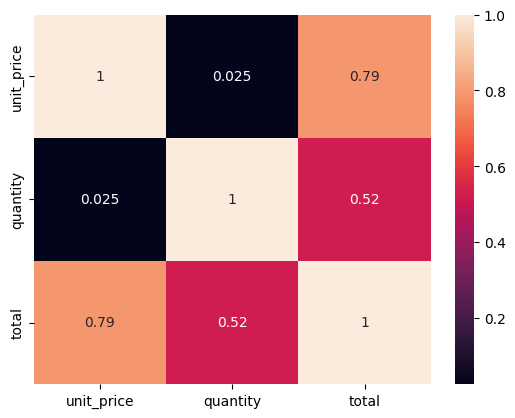

In [40]:
# Correlation Analysis
corr=data[data.columns[~(data.dtypes=='object')]].corr()

sns.heatmap(corr,annot=True)


In [43]:
data.iloc[:,3:]

,category,customer_type,unit_price,quantity,total,payment_type
0,fruit,gold,3.99,2,7.98,e-wallet
1,fruit,standard,3.99,1,3.99,e-wallet
2,fruit,premium,0.19,2,0.38,e-wallet
3,fruit,gold,0.19,4,0.76,e-wallet
4,fruit,basic,4.49,2,8.98,debit card
...,...,...,...,...,...,...
7824,cleaning products,basic,14.19,2,28.38,e-wallet
7825,cleaning products,standard,16.99,1,16.99,credit card
7826,cleaning products,basic,14.19,2,28.38,credit card
7827,cleaning products,basic,16.99,4,67.96,cash


In [47]:
data.iloc[:,5:8]

,unit_price,quantity,total
0,3.99,2,7.98
1,3.99,1,3.99
2,0.19,2,0.38
3,0.19,4,0.76
4,4.49,2,8.98
...,...,...,...
7824,14.19,2,28.38
7825,16.99,1,16.99
7826,14.19,2,28.38
7827,16.99,4,67.96


C:\Users\91845\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\91845\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\91845\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\91845\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\91845\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigne

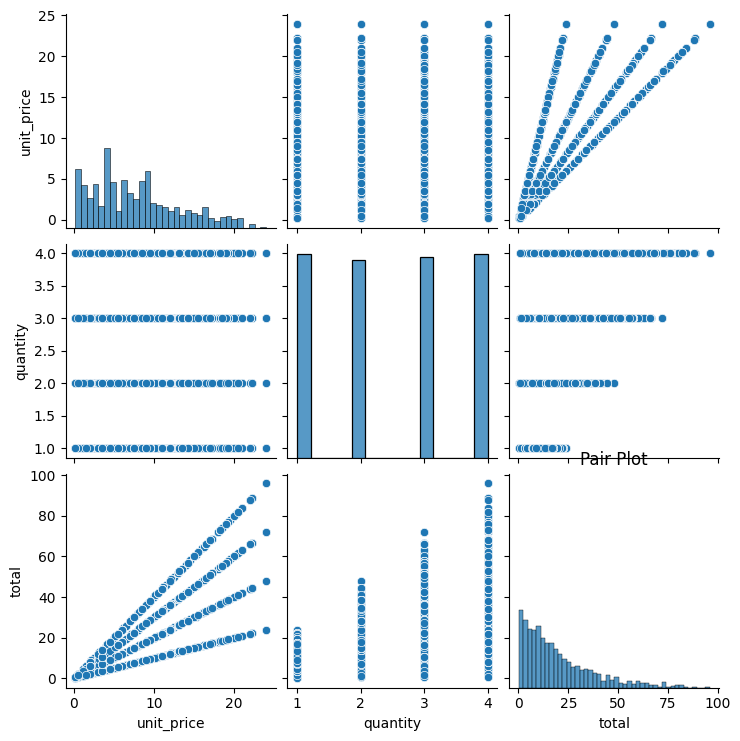

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = data.iloc[:,3:]
df_n = data.iloc[:,5:8]
# Pair Plots (Visualize relationships between numerical variables)
sns.pairplot(df_n, palette='Set1')
plt.title('Pair Plot')
plt.show()


# Feature ENGGINERING 

In [77]:
data.columns

Index(['transaction_id', 'timestamp', 'product_id', 'category',
       'customer_type', 'unit_price', 'quantity', 'total', 'payment_type',
       'Month', 'Day'],
      dtype='object')

In [76]:
data['category'].value_counts() # fRUITS and Vegetables and packaged foods are more consumed 

category
fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: count, dtype: int64

In [79]:
data['customer_type'].value_counts() 

customer_type
non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
Name: count, dtype: int64

In [81]:
data['payment_type'].value_counts()

payment_type
cash           2027
credit card    1949
e-wallet       1935
debit card     1918
Name: count, dtype: int64